# Mr. Cooper - HPI Case Study

Loading required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import itertools

Exploratory Data Analysis

In [2]:
df = pd.read_csv("C:/Users/Dilip/Desktop/HPI.csv")
df.columns = ['quarter', 'units']
df['quarter'] = pd.to_datetime(df['quarter']).dt.to_period('Q')
print(df.head())

  quarter   units
0  2010Q1   94.24
1  2010Q2   99.81
2  2010Q3   99.40
3  2010Q4  106.63
4  2011Q1  115.99


Plot1

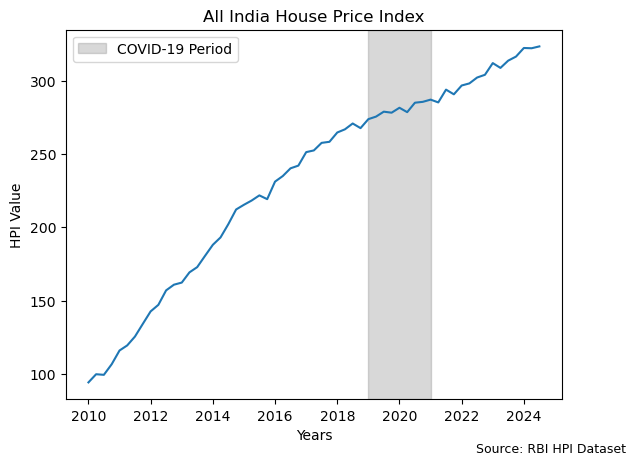

In [3]:
plt.plot(df['quarter'].dt.to_timestamp(), df['units'], linestyle='-')
plt.axvspan(pd.Timestamp('2019'), pd.Timestamp('2021'), color='grey', alpha=0.3, label='COVID-19 Period')
plt.legend()
plt.figtext(1,0,'Source: RBI HPI Dataset', ha='right', fontsize=9)
plt.xlabel("Years")
plt.ylabel("HPI Value")
plt.title("All India House Price Index")
plt.show()

Autocorrelations

In [4]:
print(f"auto-correlation: {df['units'].autocorr()}")

auto-correlation: 0.9986769421120212


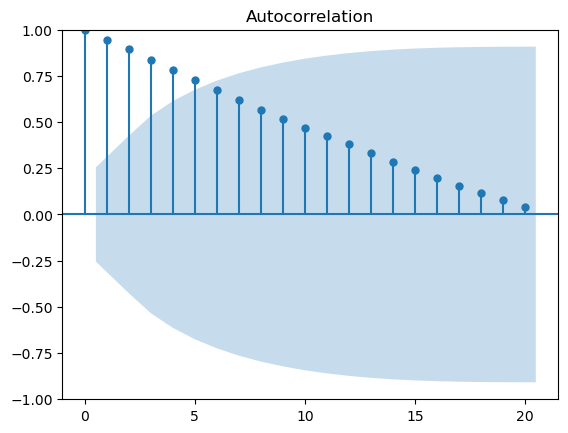

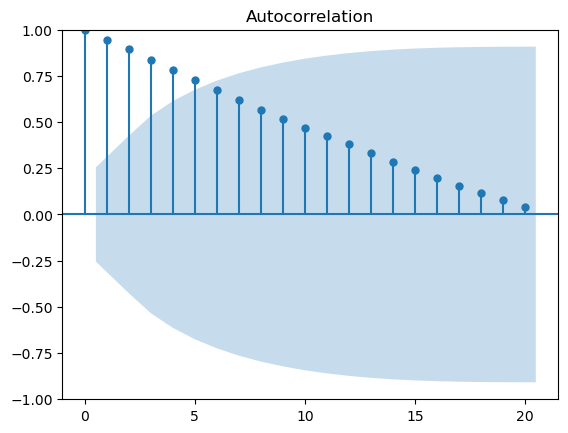

In [6]:
plot_acf(df['units'], lags= 20, alpha=0.05)

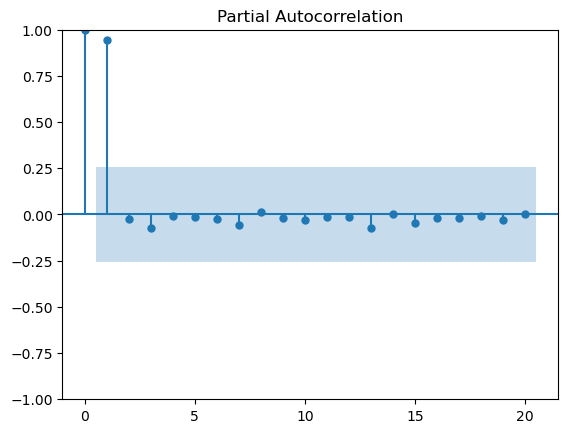

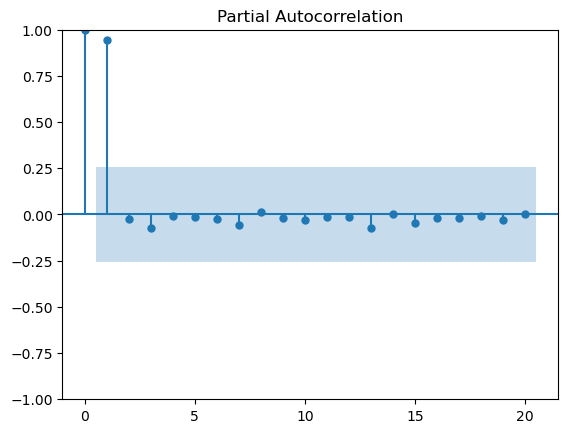

In [7]:
plot_pacf(df['units'], lags= 20, alpha=0.05)

Augmented Dickey-Fuller Test

In [8]:
result1 = adfuller(df['units'])
print(f"ADF Statistic: {result1[0]}")
print(f"p-value: {result1[1]}")

ADF Statistic: -3.1679098613025123
p-value: 0.021918958639846282


Choosing p, q for ARIMA

In [9]:
p=d=q=range(0,5)
pdq = [(x[0], 0, x[2]) for x in itertools.product(p, d, q)]  # Set d=0

result_a = []

for param in pdq:
    try:
        model_arima = ARIMA(df['units'], order=param)
        model_arima_fit = model_arima.fit()
        result_a.append((param, model_arima_fit.aic))
    except:
        continue
print(min(result_a, key=lambda x: x[1]))

C:\Users\Dilip\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dilip\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dilip\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dilip\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dilip\anaconda3\Lib\site-packages\statsmodels\tsa\state

((3, 0, 3), 325.0519897509992)


# ARIMA

In [10]:
model = ARIMA(df['units'], order=(3, 0, 3))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Dilip\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dilip\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  units   No. Observations:                   59
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -154.526
Date:                Mon, 07 Apr 2025   AIC                            325.052
Time:                        02:19:13   BIC                            341.672
Sample:                             0   HQIC                           331.540
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        218.6265     89.418      2.445      0.014      43.370     393.883
ar.L1          1.0089      0.090     11.260      0.000       0.833       1.185
ar.L2          0.9645      0.173      5.588      0.0

C:\Users\Dilip\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Plotting Residuals

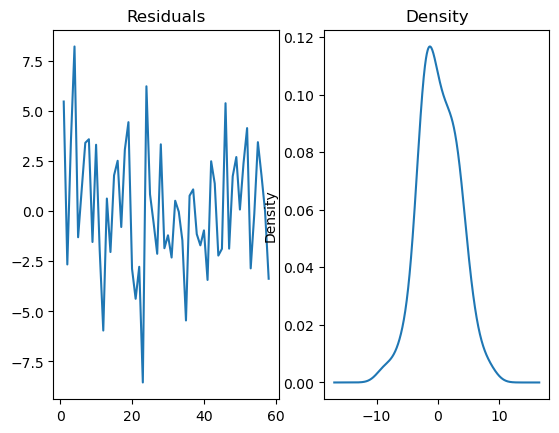

In [11]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

Residuals - autocorrelation

auto-correlation: -0.039099653250932856


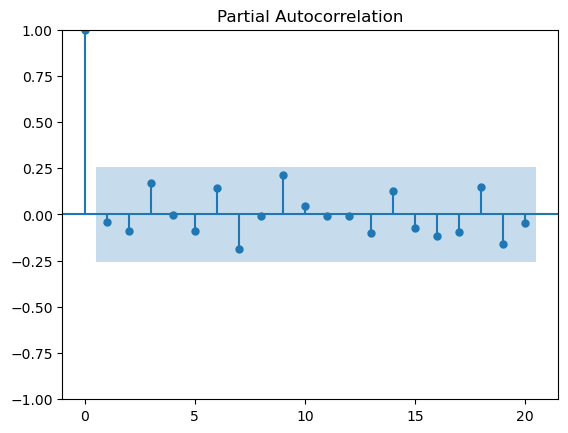

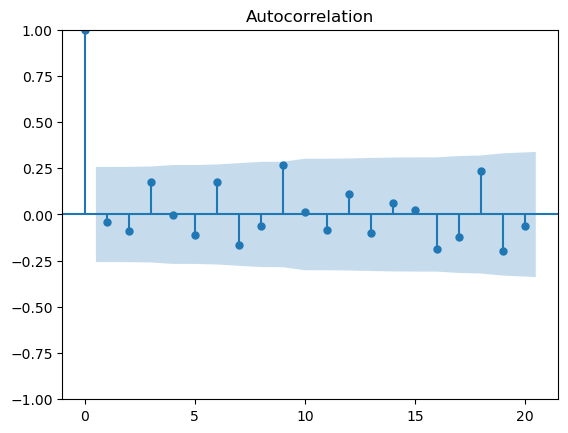

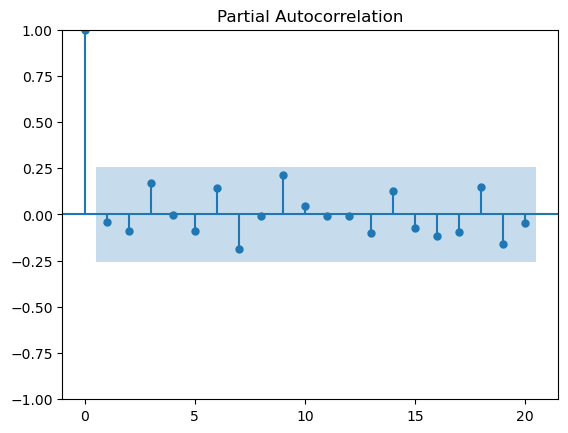

In [12]:
print(f"auto-correlation: {residuals.autocorr()}")

plot_acf(residuals, lags= 20, alpha=0.05)
plot_pacf(residuals, lags= 20, alpha=0.05)

Q-Q Plot

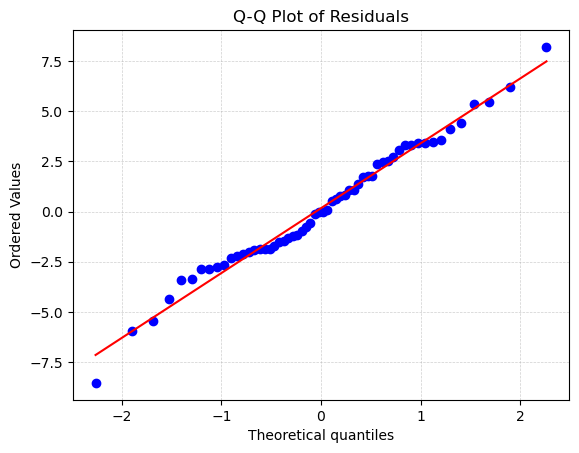

In [13]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.show()

Forecast

In [14]:
forecast = model_fit.forecast(steps=12)
print(forecast)

59    323.470436
60    326.999579
61    326.596605
62    329.827985
63    329.257269
64    332.191299
65    331.449215
66    334.087154
67    333.171073
68    335.515021
69    334.423298
70    336.476182
Name: predicted_mean, dtype: float64


Forecast Plot

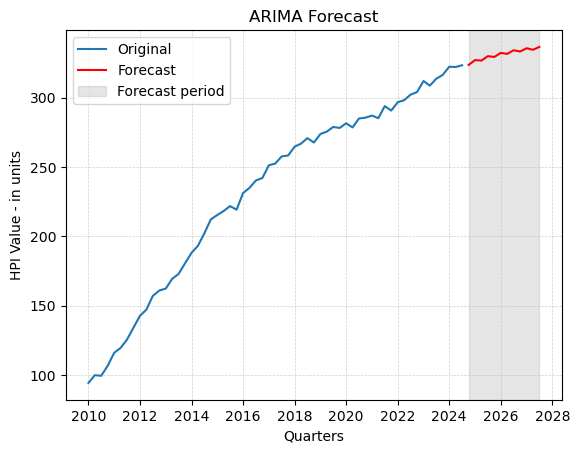

In [15]:
x_ticks = df['quarter'].dt.to_timestamp()
last_quarter = df['quarter'].iloc[-1]
forecast_quarters = pd.period_range(start=last_quarter + 1, periods=12, freq='Q')
forecast_x = forecast_quarters.to_timestamp()

plt.plot(x_ticks, df['units'], label='Original')
plt.plot(forecast_x, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.axvspan(forecast_x[0], forecast_x[-1], color='gray', alpha=0.2, label='Forecast period')
plt.title('ARIMA Forecast')
plt.xlabel('Quarters')
plt.ylabel('HPI Value - in units')
plt.legend()
plt.show()

#--------------------------------------------------------------------------